In [28]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [29]:
mp_key = "txVH20lqfEIM4Yxb2k5ptbih3BpgcIsN"
mp_id = "mp-8175"

In [30]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)
    ph_bs = m.get_phonon_bandstructure_by_material_id(mp_id)
    ph_dos = m.get_phonon_dos_by_material_id(mp_id)
conv_struc = SpacegroupAnalyzer(prim_struc).get_conventional_standard_structure()
symmops = SpacegroupAnalyzer(conv_struc).get_space_group_operations()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving PhononBSDOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Analyse du Diffractogramme

Nous analysons ici le spectre de diffraction infrarouge du cristal, issu de la figure de diffraction générée par un faisceau de lumière infrarouge Cu Kα, de longueur d’onde λ = 1.54060 Å. En fonction de l'angle incident 2θ, l’intensité des pics de diffraction varie, mettant en évidence les plans cristallographiques du matériau.

Cette variation est directement liée à la distance interplanaire d, qui caractérise l’espacement entre les plans atomiques du cristal. Conformément à la loi de Bragg :  $nλ=2dsinθ$

Les interférences constructives surviennent lorsque la différence de marche entre les rayons diffractés (différence de distance parcourue entre deux rayons réfléchis sur des plans crystallographiques adjacents) est un multiple entier de la longueur d’onde λ, donnant naissance aux pics du spectre de diffraction. Ces pics permettent ainsi d'identifier la structure cristalline du matériau et d’en extraire des informations sur ses paramètres de maille. De plus, n est appelé l'ordre de réflexion.

In [31]:
from pymatgen.analysis.diffraction.xrd import *
import matplotlib.pyplot as plt

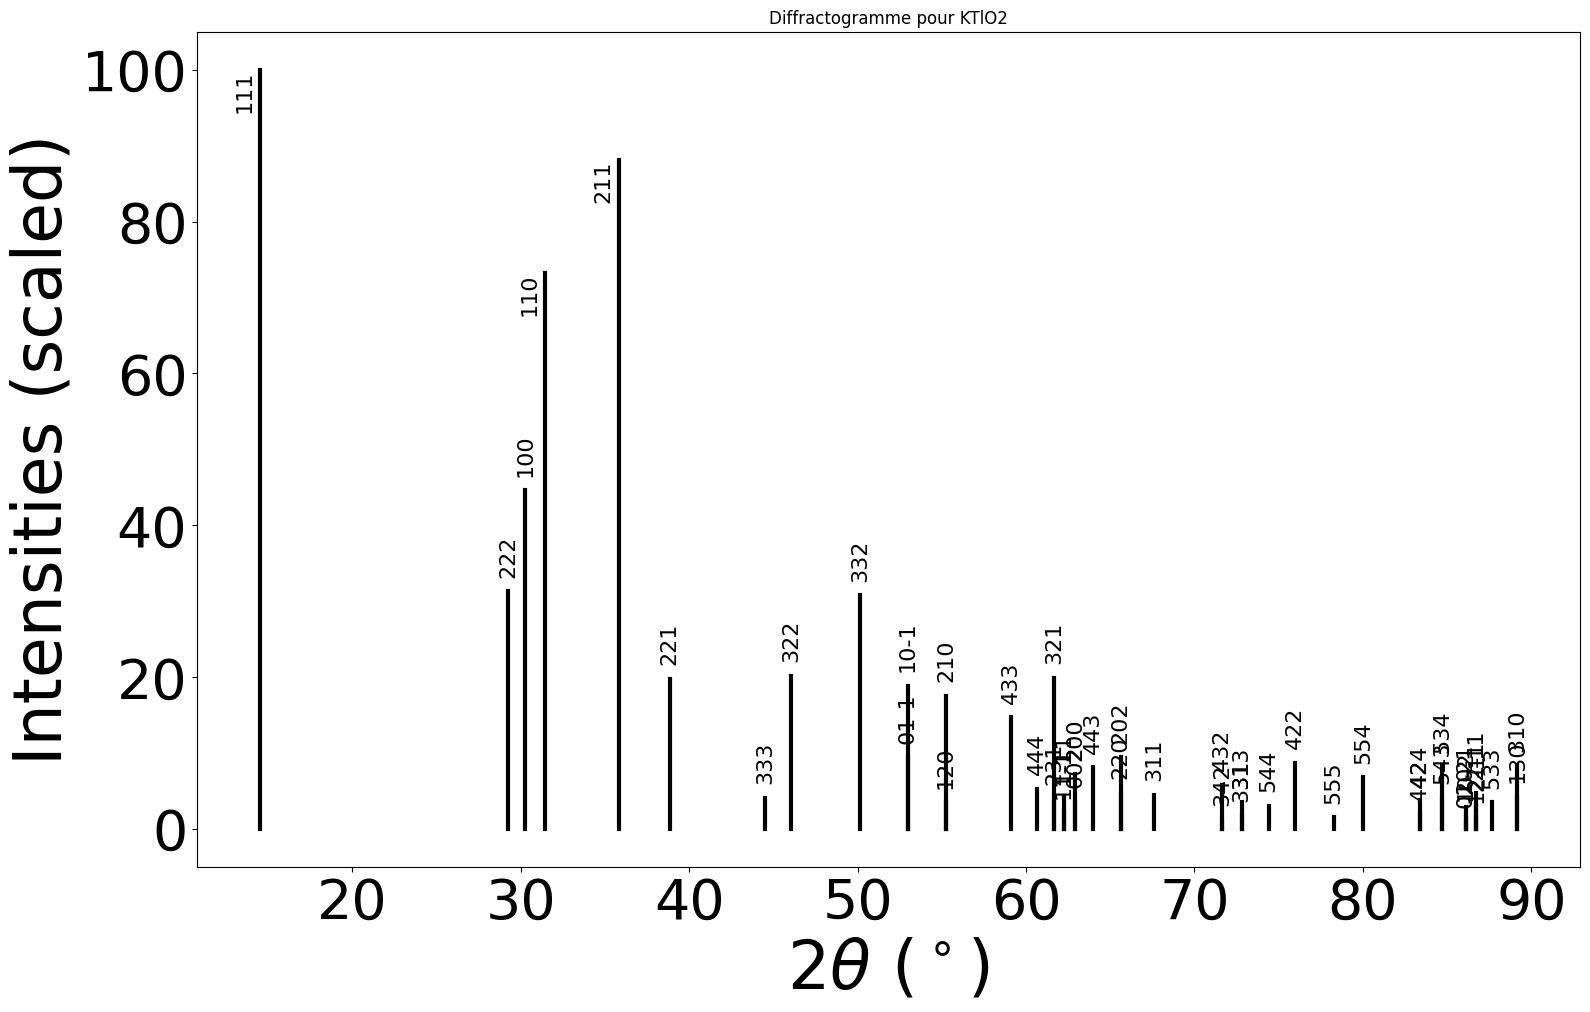

In [32]:
w_length = 1.54060
xrd_calculator = XRDCalculator(w_length)
pattern= xrd_calculator.get_pattern(prim_struc)

#diffractogramme
fig = xrd_calculator.get_plot(prim_struc)
plt.title(f"Diffractogramme pour KTlO2")
plt.show() 

L'unité de l'intensité (scaled) signifie que les valeur sont mises à l'échelle. Le pic le plus intense est normalisé à 100 et les autres intensités sont exprimées propotionnellement à ce maximum.

In [36]:
#pics
print("Les trois premiers pics de diffractions sont : \n")
for i in range(3):
    hkl = pattern.hkls[i][0]['hkl']
    d_hkl = pattern.d_hkls[i]
    intensity = pattern.y[i]
    print (f"Pic {i+1}:\n 2\u03B8 = {pattern.x[i]:.2f}° \n Indices hkl = {hkl} \n Intensité = {intensity : .2f} \n distance interplanaire = {d_hkl:.2f} Å\n")


Les trois premiers pics de diffractions sont : 

Pic 1:
 2θ = 14.52° 
 Indices hkl = (0, 0, 0, 3) 
 Intensité =  100.00 
 distance interplanaire = 6.10 Å

Pic 2:
 2θ = 29.27° 
 Indices hkl = (0, 0, 0, 6) 
 Intensité =  31.30 
 distance interplanaire = 3.05 Å

Pic 3:
 2θ = 30.28° 
 Indices hkl = (1, 0, -1, 1) 
 Intensité =  44.63 
 distance interplanaire = 2.95 Å



On remarque directement que les résultats ci-dessus sont en adéquation avec le graphique représenté précédemment.

Comme nous avons une structure trigonal, si l'on convertissait notre maille rhomboédrique en maille hexagonale équivalente nous aurions alors comme indices de Bravais-Miller (hkil) avec $i = -(h+k)$.